# prepare script; read web page

In [3]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

url = "https://www.themealdb.com/meal/53082-Strawberries-Romanoff-Recipe"
page = urlopen(url)
html = page.read().decode("utf-8")
soup = BeautifulSoup(html, "html.parser") 
#the string "html.parser", tells the object which parser to use behind the scenes. "html.parser" represents Python’s built-in HTML parser

## Scrape figcaption tags from the page

In [2]:
# Define the CSS path
# css_path = "html.csstransforms.csstransforms3d.csstransitions body.homepage section#feature div.container div.center table tbody tr td table tbody tr td a figure figcaption"
css_path = "figure figcaption"


data = []
elements = soup.select(css_path)
for element in elements:
    data.append(element.get_text(strip=True))

# Print the scraped data
for item in data:
    print(item)

2 pint  Strawberries
4 tbs Sugar
4 tbs Grand Marnier
1 cup  Cream
1/4 cup Sour Cream


## The next cell doesn't work
css_path is too specific.

In [ ]:
# Define the CSS path
# css_path = "html.csstransforms.csstransforms3d.csstransitions body.homepage section#feature div.container div.center table tbody tr td table tbody tr td a figure figcaption"
# css_path = 'a[href="/ingredient/304-Strawberries"] figure figcaption'
css_path = 'a[href] figure figcaption'  # https://developer.mozilla.org/en-US/docs/Web/CSS/Attribute_selectors


data = []
elements = soup.select(css_path)
for element in elements:
    data.append(element.get_text(strip=True))

# Print the scraped data
for item in data:
    print(item)

## Some information

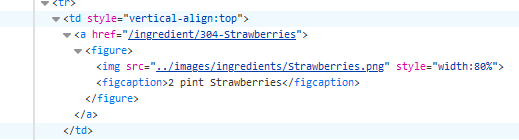


### css selector

div.center:nth-child(1) > table:nth-child(1) > tbody:nth-child(1) > tr:nth-child(2) > td:nth-child(2) > table:nth-child(1) > tbody:nth-child(1) > tr:nth-child(1) > td:nth-child(1) > a:nth-child(1) > figure:nth-child(1) > figcaption:nth-child(2)

### xpath

/html/body/section/div/div/table/tbody/tr[2]/td[2]/table/tbody/tr[1]/td[1]/a/figure/figcaption

### css path

html.csstransforms.csstransforms3d.csstransitions body.homepage section#feature div.container div.center table tbody tr td table tbody tr td a figure figcaption

## Scraping all URL from a given file

In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

filename_urls = "themealdb-urls.txt"
css_path = "figure figcaption"  # CSS path for elements to be scraped

# Read URLs from a file
with open(filename_urls, "r") as file:
    urls = [line.strip() for line in file if line.strip()]

for url in urls:
    print(f"Scraping URL: {url}")
    try:
        page = urlopen(url)
        html = page.read().decode("utf-8")
        soup = BeautifulSoup(html, "html.parser")
        
        data = []
        elements = soup.select(css_path)
        for element in elements:
            data.append(element.get_text(strip=True))

        # Print the scraped data
        if data:
            for item in data:
                print(item)
        else:
            print("No data found for the given CSS path.")
    
    except Exception as e:
        print(f"Error scraping {url}: {e}")


### Additional exercise
* Create another urls-file
* Chose an appropriate meaningfull tag (css_path)
* Try to get it running